# **Semantic Embeddings**
## *Applications in Psychology and the Neurosciences*

---



In [ ]:
# Load Necessary Libraries
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from gensim.models import KeyedVectors
import gensim.downloader

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
glove = gensim.downloader.load('glove-wiki-gigaword-300')
word2vec = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

## **Word Embeddings**

### **GloVE Model**
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Let's download one of the pre-trained models. There are many to choose from, but let's use the one that was trained through Wikipedia.

In [ ]:
# Import GloVe Model
# glove = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


#### **Example One**
We can find a word in the GloVe dictionary are reveal its corresponding vector.

In [ ]:
glove['listen']

array([-4.0522e-01, -2.4357e-01, -3.9576e-01,  1.6074e-01, -1.8246e-01,
       -2.3187e-01,  5.5761e-02, -6.9844e-02,  1.7470e-01, -8.1834e-01,
       -3.2243e-02, -1.6521e-01,  3.3051e-01,  3.6559e-02,  5.6443e-01,
       -3.1654e-01, -9.9705e-02, -2.3686e-01,  7.1997e-01, -1.0157e-02,
        5.3477e-01,  3.7797e-01,  1.3178e-01,  3.9883e-01, -6.6086e-01,
       -2.2982e-01,  1.2990e-01,  1.5472e-01,  1.5428e-01, -1.9242e-01,
       -3.5541e-01, -3.7849e-01, -3.1474e-01, -4.3576e-01, -8.9141e-01,
        2.4771e-01, -2.2064e-01, -3.4831e-01, -2.1585e-01, -3.7261e-01,
        2.1803e-01,  2.3514e-01, -5.2969e-01,  1.3728e-01,  1.2025e-01,
        5.6586e-01,  3.0662e-01, -2.0715e-01, -1.2099e-01,  1.9524e-01,
        1.3601e-01,  9.3170e-02, -4.2205e-01, -5.7556e-01, -2.0417e-01,
        6.8551e-01, -8.1047e-02,  6.3825e-02,  9.6687e-02,  5.4042e-01,
        1.1374e-01, -4.7754e-01,  1.9241e-01,  8.1021e-01,  1.1537e-01,
       -1.0148e-02,  7.2937e-01,  2.8353e-01, -9.9503e-02,  4.60

In [ ]:
glove['hear']

array([-0.037766 ,  0.53881  ,  0.75407  , -0.18197  , -0.64225  ,
        0.85587  , -0.6885   ,  0.30163  ,  0.27817  , -1.1247   ,
        0.1609   ,  0.21545  , -0.12533  ,  0.067352 ,  0.055924 ,
       -0.31621  , -0.69537  ,  0.41979  , -0.46417  ,  0.59416  ,
       -0.14298  , -0.51765  ,  0.074196 , -0.87629  , -0.076729 ,
       -0.066771 , -0.041785 ,  0.052378 ,  1.4092   ,  0.15677  ,
        0.10753  , -0.0083313,  0.30327  ,  0.67538  , -0.55822  ,
        0.28002  , -0.18447  , -0.3375   ,  1.0683   , -0.58895  ,
       -0.48451  , -0.006247 , -0.26566  , -0.83246  , -0.49781  ,
       -0.28771  ,  0.12445  , -0.69842  ,  0.030756 , -1.4498   ,
        0.44712  , -0.22895  ,  0.4209   ,  0.11722  , -0.066422 ,
       -1.4403   ,  0.10916  ,  0.093753 ,  1.3541   ,  0.15767  ,
       -0.02006  ,  1.1728   , -0.22594  , -0.61175  ,  0.4487   ,
       -0.070912 ,  0.65395  ,  0.90912  , -0.93871  , -0.14871  ,
        0.27689  , -0.14524  ,  0.1947   , -1.0849   ,  0.0652

#### **Your Turn**
Using the same style as above, output the vector for two words of your choosing. Comment on how similar you think these words are based on the vector outputs.

In [ ]:
# Code Space Provided


#### **Example Two**
We cannot determine how similar two words are solely by looking at their output vectors. We must have a way of quantifying the similarity. This is where dot product comes in.  Let's build this function together.

In [ ]:
def similarity(word1, word2):
  # First, lets find the embedding of each word
  word1_embedding =
  word2_embedding =

  # Next, lets calculate the dot product using np.dot
  dot_product =

  # Let's not forget to scale the dot product. We can use the np.linalg.norm function to find the magnitude of the vector
  cosine_similarity = dot_product /

  return cosine_similarity

Now, let's put this new function to use. How similar are those words?

In [ ]:
similarity('listen', 'hear')

As you can see, these two words have a cosine_similarity value above 0.8. This signifies that these words are quite similar.

#### **Your Turn**
Take the two words you used before and calculate their similarity. Are they more or less related than the example? Why do you think that is?

In [ ]:
# Code space provided


#### **Example Three**
We can also use word embeddings to see which words are most similar to our word of choice. We can create a function which takes our word and looks within the dictionary to find which word has the highest cosine similarity value.\
This code is provided below.

In [ ]:
def most_similar(word, topn=5):
    word_vector = glove[word]
    similarities = np.dot(glove.vectors, word_vector)
    most_similar_indices = np.argsort(similarities)[::-1][:topn+1]
    most_similar_words = [glove.index_to_key[index] for index in most_similar_indices]

    return most_similar_words[1:]


Using the words we used before, let's see which words are the most similar.

In [ ]:
most_similar('listen')

['hear', 'listening', 'listened', 'you', 'listens']

In [ ]:
most_similar('hear')

['heard', 'listen', 'hearing', 'loud', 'hears']

Are these words what you expected?

\
#### **Your turn**
Use the function above to find which words are most closely correspond to the words of your choosing. Anything interesting?

In [ ]:
# Code space provided


### **Word2vec**
This is another model which transforms words into vectors. Let's compare to see if we get the same results as GloVe.\
Let's first load the pre-trained Word2vec embeddings. There are many to choose from, but let's use the one trained through Google News.

In [ ]:
# Import word2vec model
# word2vec = gensim.downloader.load('word2vec-google-news-300')

#### **Example Four**
Just like we did with GloVe, let's check out the embeddings for some words.  Using the spece provided below, find the vectors for the same words you used in the previous exercise. At first glance, is it what you expected?

In [ ]:
# Code space provided


#### **Example Five**
Let's quantify the similarity between these two words. You can create another function if you would like, but we can use a built-in function to speed things up. The code is provided below. \
Now compare this results with the cosine similarity value you obtained with GloVe. Do they match?

In [ ]:
# Code space provided
word2vec.similarity('word1', 'word2')

#### **Example Six**
Let's see if the most similar words match between the two models. Implement the similarity call below and comment on their differences.

In [ ]:
# Code space provided

#### **Example Seven**
Let's look closer to analogies and see how word vectors can reveal some interesting patterns. Because vectors exist in a defined space, we can add and subtract them to produce new vectors.

We'll use the example, *King is to man as Queen is to woman*.  Start by embedding the four words in the analogy.

In [ ]:
# Code space provided


Next, let's subtract *King* from *man* and add *Queen*.

In [ ]:
# Code space provided


We can take this new vector and use try to find the corresponding word. The code is provided below.\
Did the model accurately predict the word? Compare between models.

In [ ]:
word2vec.similar_by_vector('name of your new vector')

#### **Your Turn**
Follow the same steps to complete a word analogy of your choosing.

In [ ]:
# Code space provided


## **Sentence Embeddings**
### **Universal Sentence Encoder**
The Universal Sentence Encoder goes beyond simple word embeddings by encoding longer pieces of text such as complete sentences and paragraphs. It not only captures semantic context, but also episodic context. Be careful though, the longer the text, the more diluted a single piece of information becomes.

In [ ]:
# Import USE Model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)

def embed(input):
  return model(input)

#### **Example Eight**
Let's start by embedding a simple sentence.  We can do this by using the embed function. Make sure you place your sentence sting within square brackets to avoid any errors.

In [ ]:
sentence = 'We are all brilliant psychologists.'
embed([sentence])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-3.28203402e-02, -2.88747046e-02, -6.42694756e-02,
         2.89674159e-02,  2.01339293e-02, -4.72417362e-02,
         2.96502421e-03, -6.24607205e-02, -3.05522792e-02,
         3.43488865e-02,  6.19974732e-02, -2.08899453e-02,
        -4.47987169e-02,  9.25845876e-02, -4.62084226e-02,
        -9.80153158e-02, -8.63378868e-02, -4.44490789e-03,
        -3.10414713e-02, -8.40312243e-02, -5.66582903e-02,
         1.00537920e-02,  4.87139821e-02,  6.53077289e-02,
         2.59781945e-02,  1.96359698e-02, -5.41159399e-02,
        -2.01782919e-02,  4.34281230e-02,  3.63677181e-02,
        -1.73891224e-02,  9.78162363e-02,  1.40664512e-02,
        -4.91997525e-02, -2.42102537e-02,  6.55791685e-02,
        -1.53833115e-02, -4.58728895e-03, -1.56004531e-02,
        -6.38343766e-02, -5.63482232e-02,  3.14475317e-03,
         2.09593680e-02,  6.89798892e-02,  4.86417040e-02,
         6.45037964e-02,  2.98368745e-02,  6.72333091e-02,
      

Just like before, the model output a vector of numbers. Are there any evident difference between the GloVe and Word2Vec outputs?

#### **Example Nine**
A heatmap is a great way to show the relationship between vectors. The code is provided below.\
Your task is to create a list of five sentences and visualize their similarity using the heatmap.

In [ ]:
# Heatmap Function
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="Blues")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

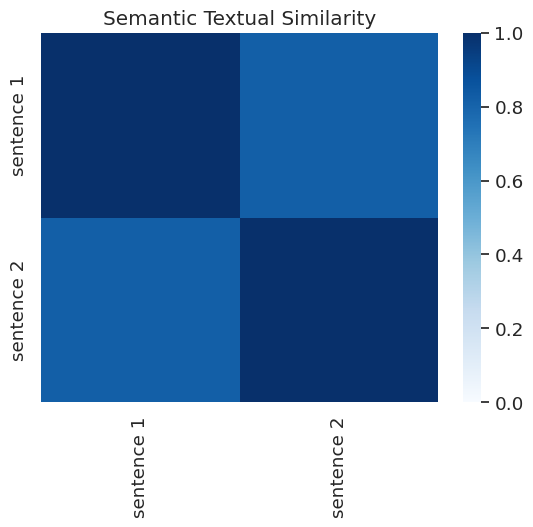

In [ ]:
# Code space provided
sentences = ['sentence 1',
             'sentence 2']

run_and_plot(sentences)

#### **Example Ten**
The previous examples shows the similarity between sentences of the same sample. We can also use the USE and heatmap visualization to show the similarity of two different sentence sets. Let's make a quick adjustment to the function.

In [ ]:
def plot_similarity_new(labels1, labels2, features1, features2, rotation):
  corr = np.inner(features1, features2)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels2,
      yticklabels=labels1,
      vmin=0,
      vmax=1,
      cmap="Blues")
  g.set_xticklabels(labels2, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot_new(messages1_, messages2_):
  message_embeddings1_ = embed(messages1_)
  message_embeddings2_ = embed(messages2_)
  plot_similarity_new(messages1_, messages2_, message_embeddings1_, message_embeddings2_, 90)

Now, create a new list of 5 sentences and we will visualize the similarity between the set of sentences from the previous examples.

[[1.0000002  0.8197156  0.7471293 ]
 [0.81971574 1.         0.76990867]]


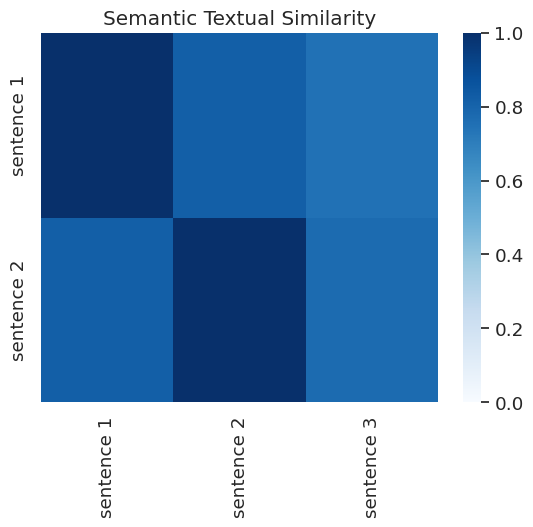

In [ ]:
new_sentences = ['sentence 1',
                 'sentence 2',
                 'sentence 3']

run_and_plot_new(sentences, new_sentences)

#### **Example Eleven**
Surprisingly, there is a way that we can embed sentences using word embedding models.  But does it do as good a job as the USE? Let's investigate.

In [ ]:
string_1 = 'I attend Raptors basketball games at least once a year.'
string_2 = 'I came all the way to Toronto to see the Raptors play basketball.'

In [ ]:
# Split each sentence into individual words
tokens_1 = string_1.lower().split()
tokens_2 = string_2.lower().split()

print(tokens_1)

# Create a matrix with the embedding of each word
matrix_1 = [word2vec[token] for token in tokens_1 if token in word2vec]
matrix_2 = [word2vec[token] for token in tokens_2 if token in word2vec]

# Calculate of the word vectors
vector_1 = np.mean(matrix_1, axis=0)
vector_2 = np.mean(matrix_2, axis=0)

# Calculate the cosine similarity
cosine_similarity = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
cosine_similarity


['i', 'attend', 'raptors', 'basketball', 'games', 'at', 'least', 'once', 'a', 'year.']


0.6730073

Here is a function that accomplishes the same task.

In [ ]:
def cosine_similarity(vector1, vector2):
  cosine_similarity = np.inner(vector1, vector2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))

  return cosine_similarity

def sentence_word_embedding(sentence1, sentence2, model):
  # Split each sentence into individual words
  tokens_1 = sentence1.lower().split()
  tokens_2 = sentence2.lower().split()

  # Create a matrix with the embedding of each word
  matrix_1 = [word2vec[token] for token in tokens_1 if token in word2vec]
  matrix_2 = [word2vec[token] for token in tokens_2 if token in word2vec]

  # Calculate of the word vectors
  vector_1 = np.mean(matrix_1, axis=0)
  vector_2 = np.mean(matrix_2, axis=0)

  # Calculate the cosine similarity
  cosine_similarity(vector_1, vector_2)

  return cosine_similarity

Now, let's see whether the relationship between those two sentences is consistent if we use the USE. Embed the two sentences below and then input the vectors into the cosine_similarity function.

In [ ]:
embedding_1 =
embedding_2 =

cosine_similarity(embedding_1, embedding_2)


array([[0.6878458]], dtype=float32)

What can you observe from these results? Are there any evident differences between those two results?
#### **Your turn**
Create two sentences of your own and see whether the word embeddings accurately capture semantic similarity.

In [ ]:
# Code space provided


### **Recall Task**
Let's test whether the USE can be a useful tool to measure participants recall ability. After hearing the short story presented, recall the story by typing below.

In [ ]:
story_recall = 'Oliver was a boy that lived in a busy city. Hw was also intrigued by the human mind. He spend countless hours devouring books on psychology and attending lectures. He pursued his degree at a university and eventually opened up his own practice. He helped clients face their fear and heal from trauma. He helped a lot of people. He became a beacon of help for everyone around him.'

In [ ]:
story = '''
In a bustling city filled with dreams and ambitions, there lived a young boy named Oliver. From a tender age, Oliver had always possessed a keen sense of empathy and a deep curiosity about the human mind.
As he grew older, Oliver found himself captivated by the stories of people around him, their joys, sorrows, and the complexities of their emotions. He yearned to unravel the mysteries of the human psyche and provide solace to those in need.
Driven by his passion, Oliver spent countless hours devouring books on psychology, attending lectures, and engaging in thought-provoking conversations with mentors and experts in the field. Each encounter only fueled his desire to make a difference in the lives of others.
Through his own introspection, Oliver discovered that his purpose lay in becoming a psychologist—a guide who could navigate the intricate pathways of the mind, helping individuals navigate their own journeys of self-discovery and healing.
With unwavering determination, Oliver pursued his education, studying psychology at a prestigious university. He immersed himself in the realms of cognitive science, behaviour analysis, and therapeutic techniques, honing his skills and expanding his understanding of the human psyche.
As Oliver completed his studies and obtained his degree, he embarked on his professional journey, opening his own practice. People from all walks of life sought his guidance, seeking solace in his empathetic presence and skilled guidance.
Oliver's compassion, coupled with his expertise, allowed him to make a profound impact on his clients' lives. He helped them confront their fears, heal from past traumas, and navigate the complexities of relationships. Through therapy, he empowered individuals to unlock their potential and find inner peace.
Years passed, and Oliver's reputation as a compassionate and insightful psychologist spread far and wide. His dedication to his craft and genuine concern for his clients earned him the respect and admiration of his peers and the community.
But Oliver's true measure of success was the transformation he witnessed in the lives of those he helped. Each person who walked through his door carried a unique story, and Oliver considered it an honor to be a part of their journey towards self-discovery and growth.
And so, Oliver, the boy who dreamt of understanding the human mind, became a beacon of hope and healing for countless individuals. His unwavering commitment to his passion brought light to the lives of others and shaped his own destiny as a respected and beloved psychologist.
'''

sentences = sent_tokenize(story)
print(sentences)


['\nIn a bustling city filled with dreams and ambitions, there lived a young boy named Oliver.', 'From a tender age, Oliver had always possessed a keen sense of empathy and a deep curiosity about the human mind.', 'As he grew older, Oliver found himself captivated by the stories of people around him, their joys, sorrows, and the complexities of their emotions.', 'He yearned to unravel the mysteries of the human psyche and provide solace to those in need.', 'Driven by his passion, Oliver spent countless hours devouring books on psychology, attending lectures, and engaging in thought-provoking conversations with mentors and experts in the field.', 'Each encounter only fueled his desire to make a difference in the lives of others.', 'Through his own introspection, Oliver discovered that his purpose lay in becoming a psychologist—a guide who could navigate the intricate pathways of the mind, helping individuals navigate their own journeys of self-discovery and healing.', 'With unwavering d

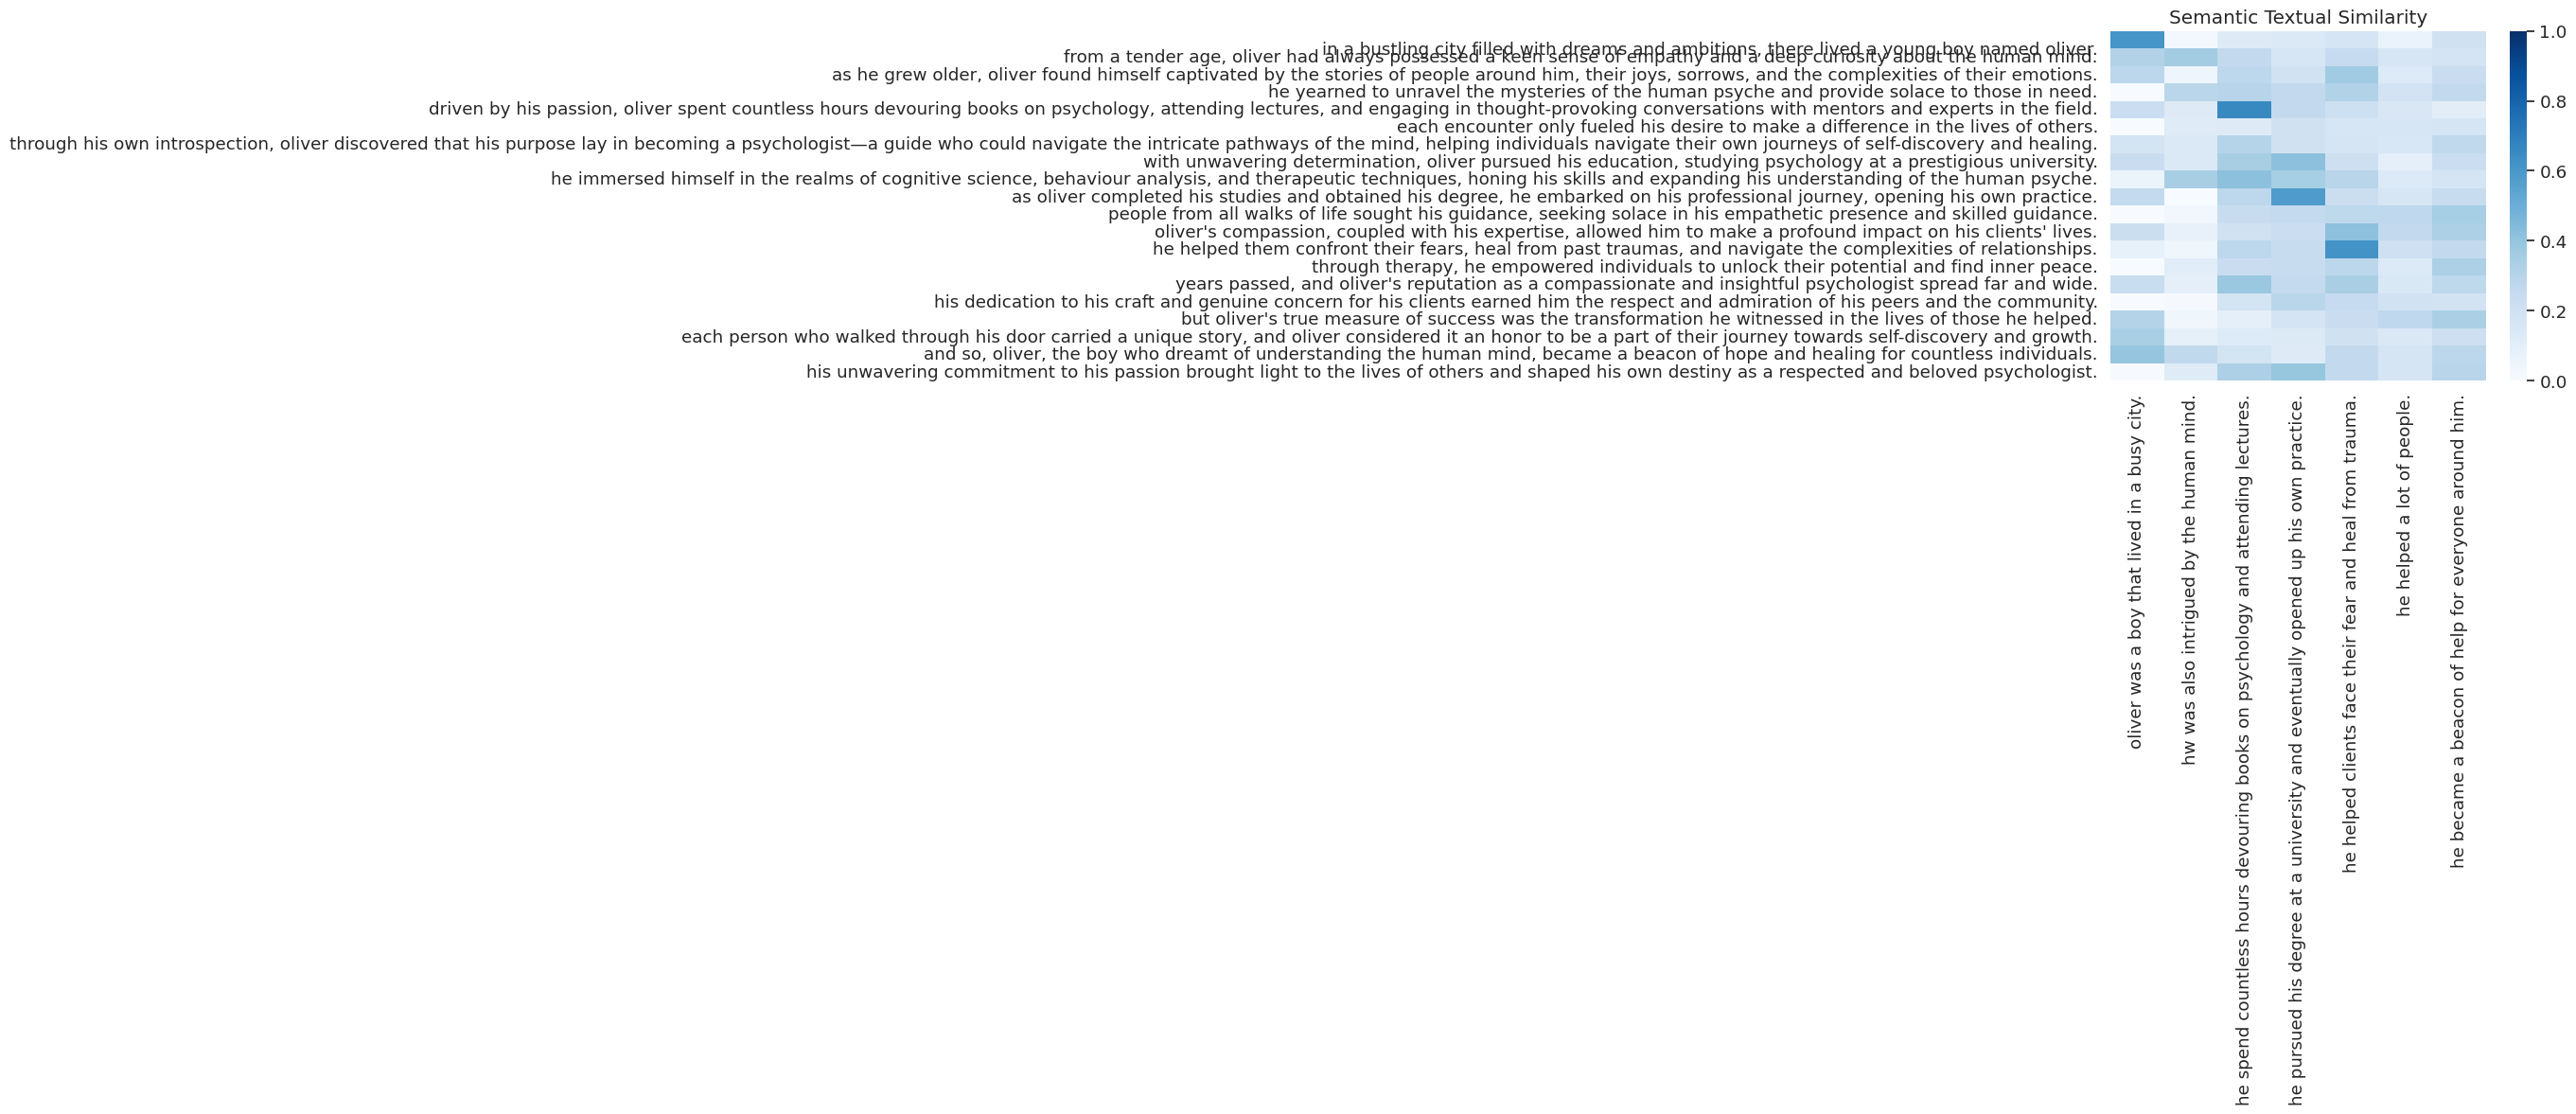

In [ ]:
# Make sure all words are lowercase and split recall into individual sentences.
recall_sentences = sent_tokenize(story_recall.lower())
story_sentences = sent_tokenize(story.lower())

run_and_plot_new(story_sentences, recall_sentences)

In [ ]:

from nltk.tokenize import sent_tokenize
test = 'My name is Ryan. My middle name is Aaron.'
sent_tokenize(test)

['My name is Ryan.', 'My middle name is Aaron.']